<a href="https://colab.research.google.com/github/vjarenga/Estimation-of-Obesity-Levels-Based-on-Eating-Habits-and-Physical-Condition/blob/main/Obesity_level_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

In [24]:
data= pd.read_csv('/content/ObesityDataSet_raw_and_data.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [25]:
# Count missing values in each column
missing_values = data.isnull().sum()
print(missing_values)


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [26]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [27]:
print(data.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

Data Type Conversion and Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [29]:
label_encoder = LabelEncoder()
binary_vars = ['Gender', 'SMOKE']  # Gender,SMOKE binary variables
for var in binary_vars:
    data[var] = label_encoder.fit_transform(data[var])

In [30]:
# One-hot encode multi-class variables
multi_class_vars = ['MTRANS', 'NObeyesdad']  # MTRANS,NObeyesdad multi-class variables
data = pd.get_dummies(data, columns=multi_class_vars, drop_first=True)

In [31]:
print(data.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0       0  21.0    1.62    64.0                            yes   no   2.0   
1       0  21.0    1.52    56.0                            yes   no   3.0   
2       1  23.0    1.80    77.0                            yes   no   2.0   
3       1  27.0    1.80    87.0                             no   no   3.0   
4       1  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC  SMOKE  ...  MTRANS_Bike MTRANS_Motorbike  \
0  3.0  Sometimes      0  ...        False            False   
1  3.0  Sometimes      1  ...        False            False   
2  3.0  Sometimes      0  ...        False            False   
3  3.0  Sometimes      0  ...        False            False   
4  1.0  Sometimes      0  ...        False            False   

   MTRANS_Public_Transportation  MTRANS_Walking NObeyesdad_Normal_Weight  \
0                          True           False                     True   
1     

Task 3: Outlier Detection and Handling

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


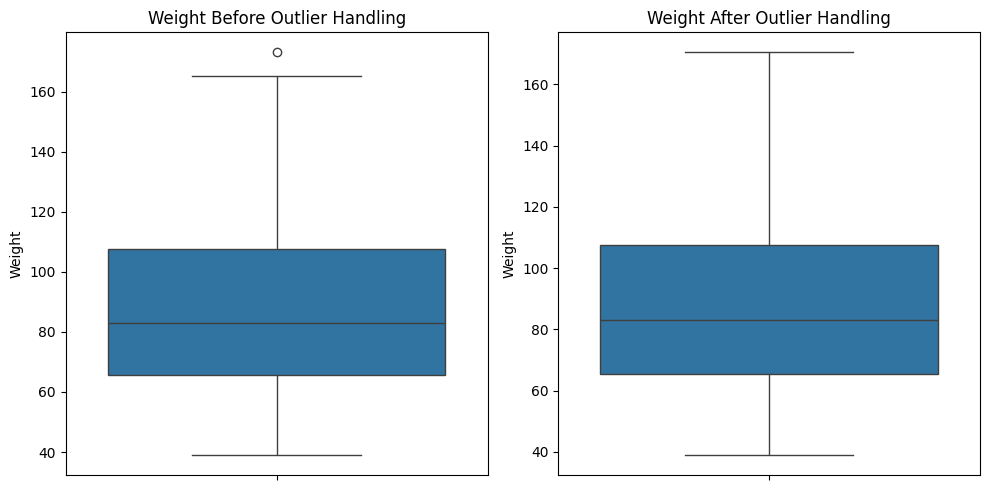


Statistics for Weight:
Number of outliers removed: 0
Original range: [39.0, 170.3666905]
New range: [39.0, 170.3666905]


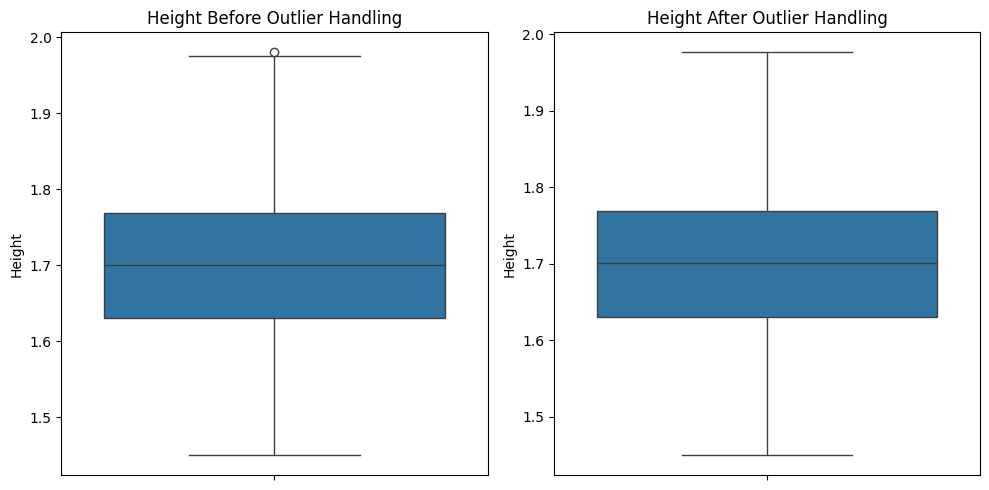


Statistics for Height:
Number of outliers removed: 0
Original range: [1.45, 1.9761600000000001]
New range: [1.45, 1.9761600000000001]


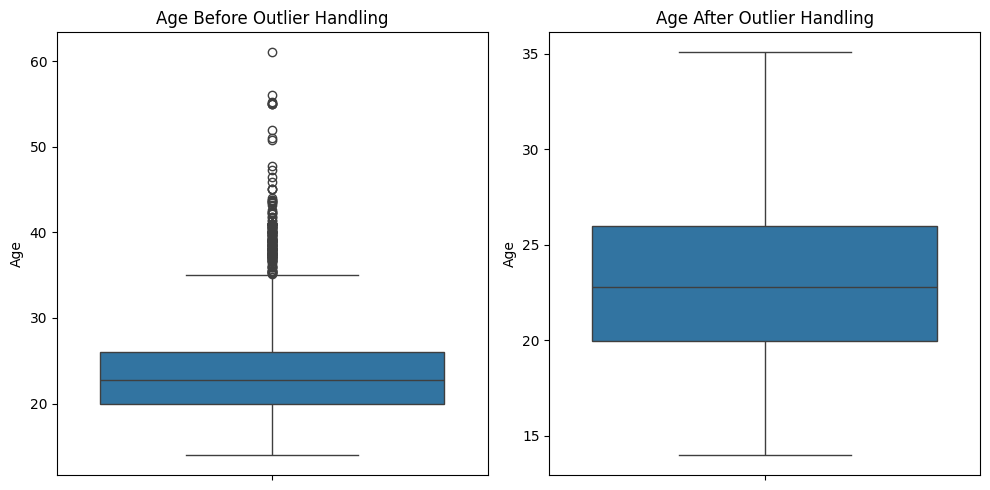


Statistics for Age:
Number of outliers removed: 0
Original range: [14.0, 35.079212]
New range: [14.0, 35.079212]


In [33]:
def detect_and_handle_outliers(df, columns):


    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Plot boxplot before handling outliers
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        sns.boxplot(y=data[column])
        plt.title(f'{column} Before Outlier Handling')

        # Cap the outliers
        data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

        # Plot boxplot after handling outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(y=data[column])
        plt.title(f'{column} After Outlier Handling')
        plt.tight_layout()
        plt.show()

        # Print statistics
        print(f"\nStatistics for {column}:")
        print(f"Number of outliers removed: {len(df[column]) - len(data[column])}")
        print(f"Original range: [{df[column].min()}, {df[column].max()}]")
        print(f"New range: [{data[column].min()}, {data[column].max()}]")

    return data

# Apply outlier detection and handling
continuous_columns = ['Weight', 'Height', 'Age']
data = detect_and_handle_outliers(data, continuous_columns)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_columns = ['Age', 'Weight', 'Height']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

print(data[scaled_columns].head())


        Age    Weight    Height
0  0.332081  0.190307  0.323096
1  0.332081  0.129409  0.133039
2  0.426961  0.289267  0.665197
3  0.616721  0.365389  0.665197
4  0.379521  0.386704  0.627186


In [35]:
print(data.describe())#summary statistics

            Gender          Age       Height       Weight         FCVC  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921     0.470145     0.478325     0.362229     2.419043   
std       0.500083     0.250362     0.177321     0.199344     0.533927   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       0.000000     0.282135     0.342101     0.201522     2.000000   
50%       1.000000     0.416424     0.476089     0.334940     2.385502   
75%       1.000000     0.569281     0.605261     0.520913     3.000000   
max       1.000000     1.000000     1.000000     1.000000     3.000000   

               NCP        SMOKE         CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000  
mean      2.685628     0.020843     2.008011     1.010298     0.657866  
std       0.778039     0.142893     0.612953     0.850592     0.608927  
min       1.000000     0.000000     1.000

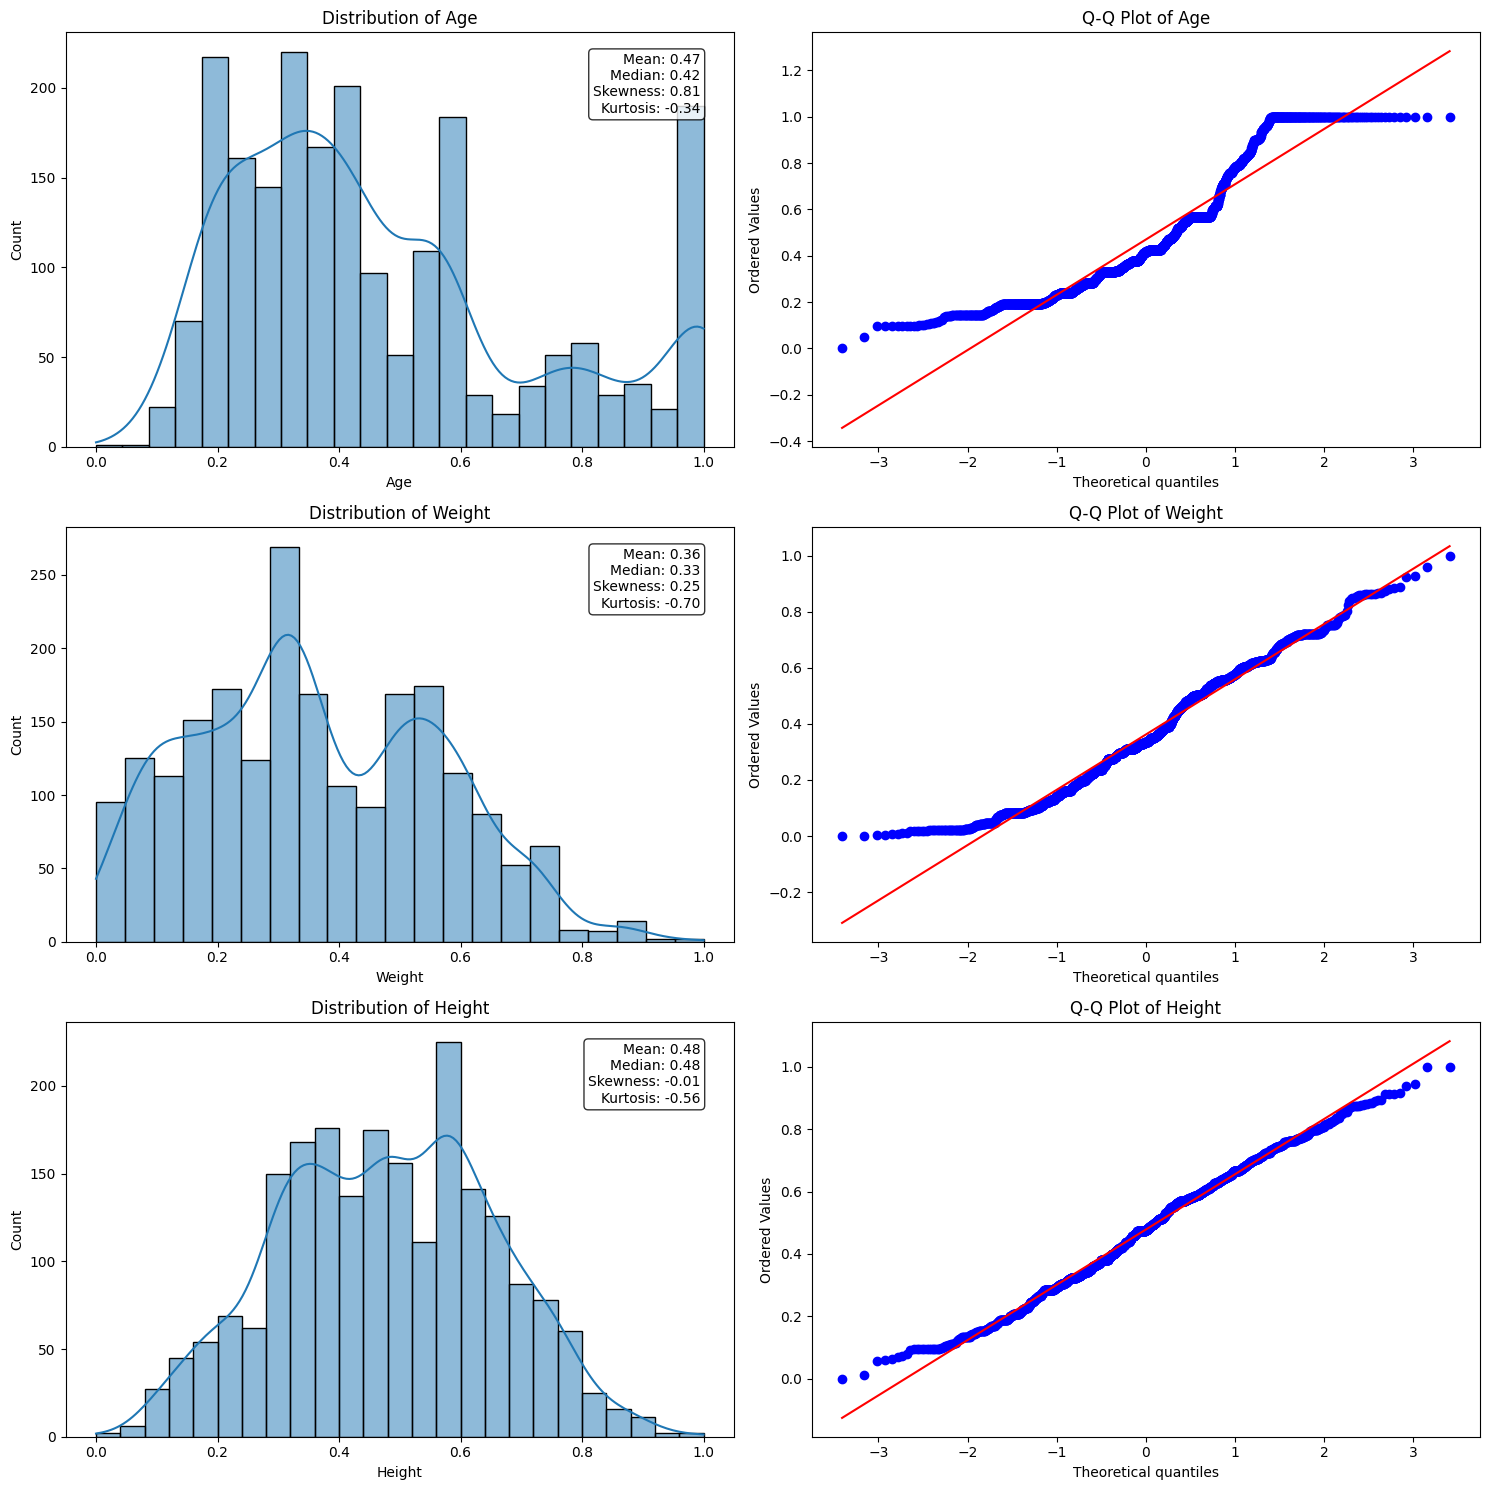

In [36]:
#distribution analysis
import scipy.stats as stats

def plot_distribution(data, variables):
    n_vars = len(variables)
    fig, axes = plt.subplots(n_vars, 2, figsize=(15, 5*n_vars))

    for i, var in enumerate(variables):
        # Histogram with KDE
        sns.histplot(data=data, x=var, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribution of {var}')

        # Q-Q plot
        stats.probplot(data[var], dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'Q-Q Plot of {var}')

        # Add distribution statistics
        mean = data[var].mean()
        median = data[var].median()
        skew = data[var].skew()
        kurt = data[var].kurtosis()

        stats_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSkewness: {skew:.2f}\nKurtosis: {kurt:.2f}'
        axes[i, 0].text(0.95, 0.95, stats_text,
                       transform=axes[i, 0].transAxes,
                       verticalalignment='top',
                       horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Plot distributions
variables = ['Age', 'Weight', 'Height']
plot_distribution(data, variables)

<ipython-input-37-00abc063e78b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
<ipython-input-37-00abc063e78b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
<ipython-input-37-00abc063e78b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
<ipython-input-37-00abc063e78b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)


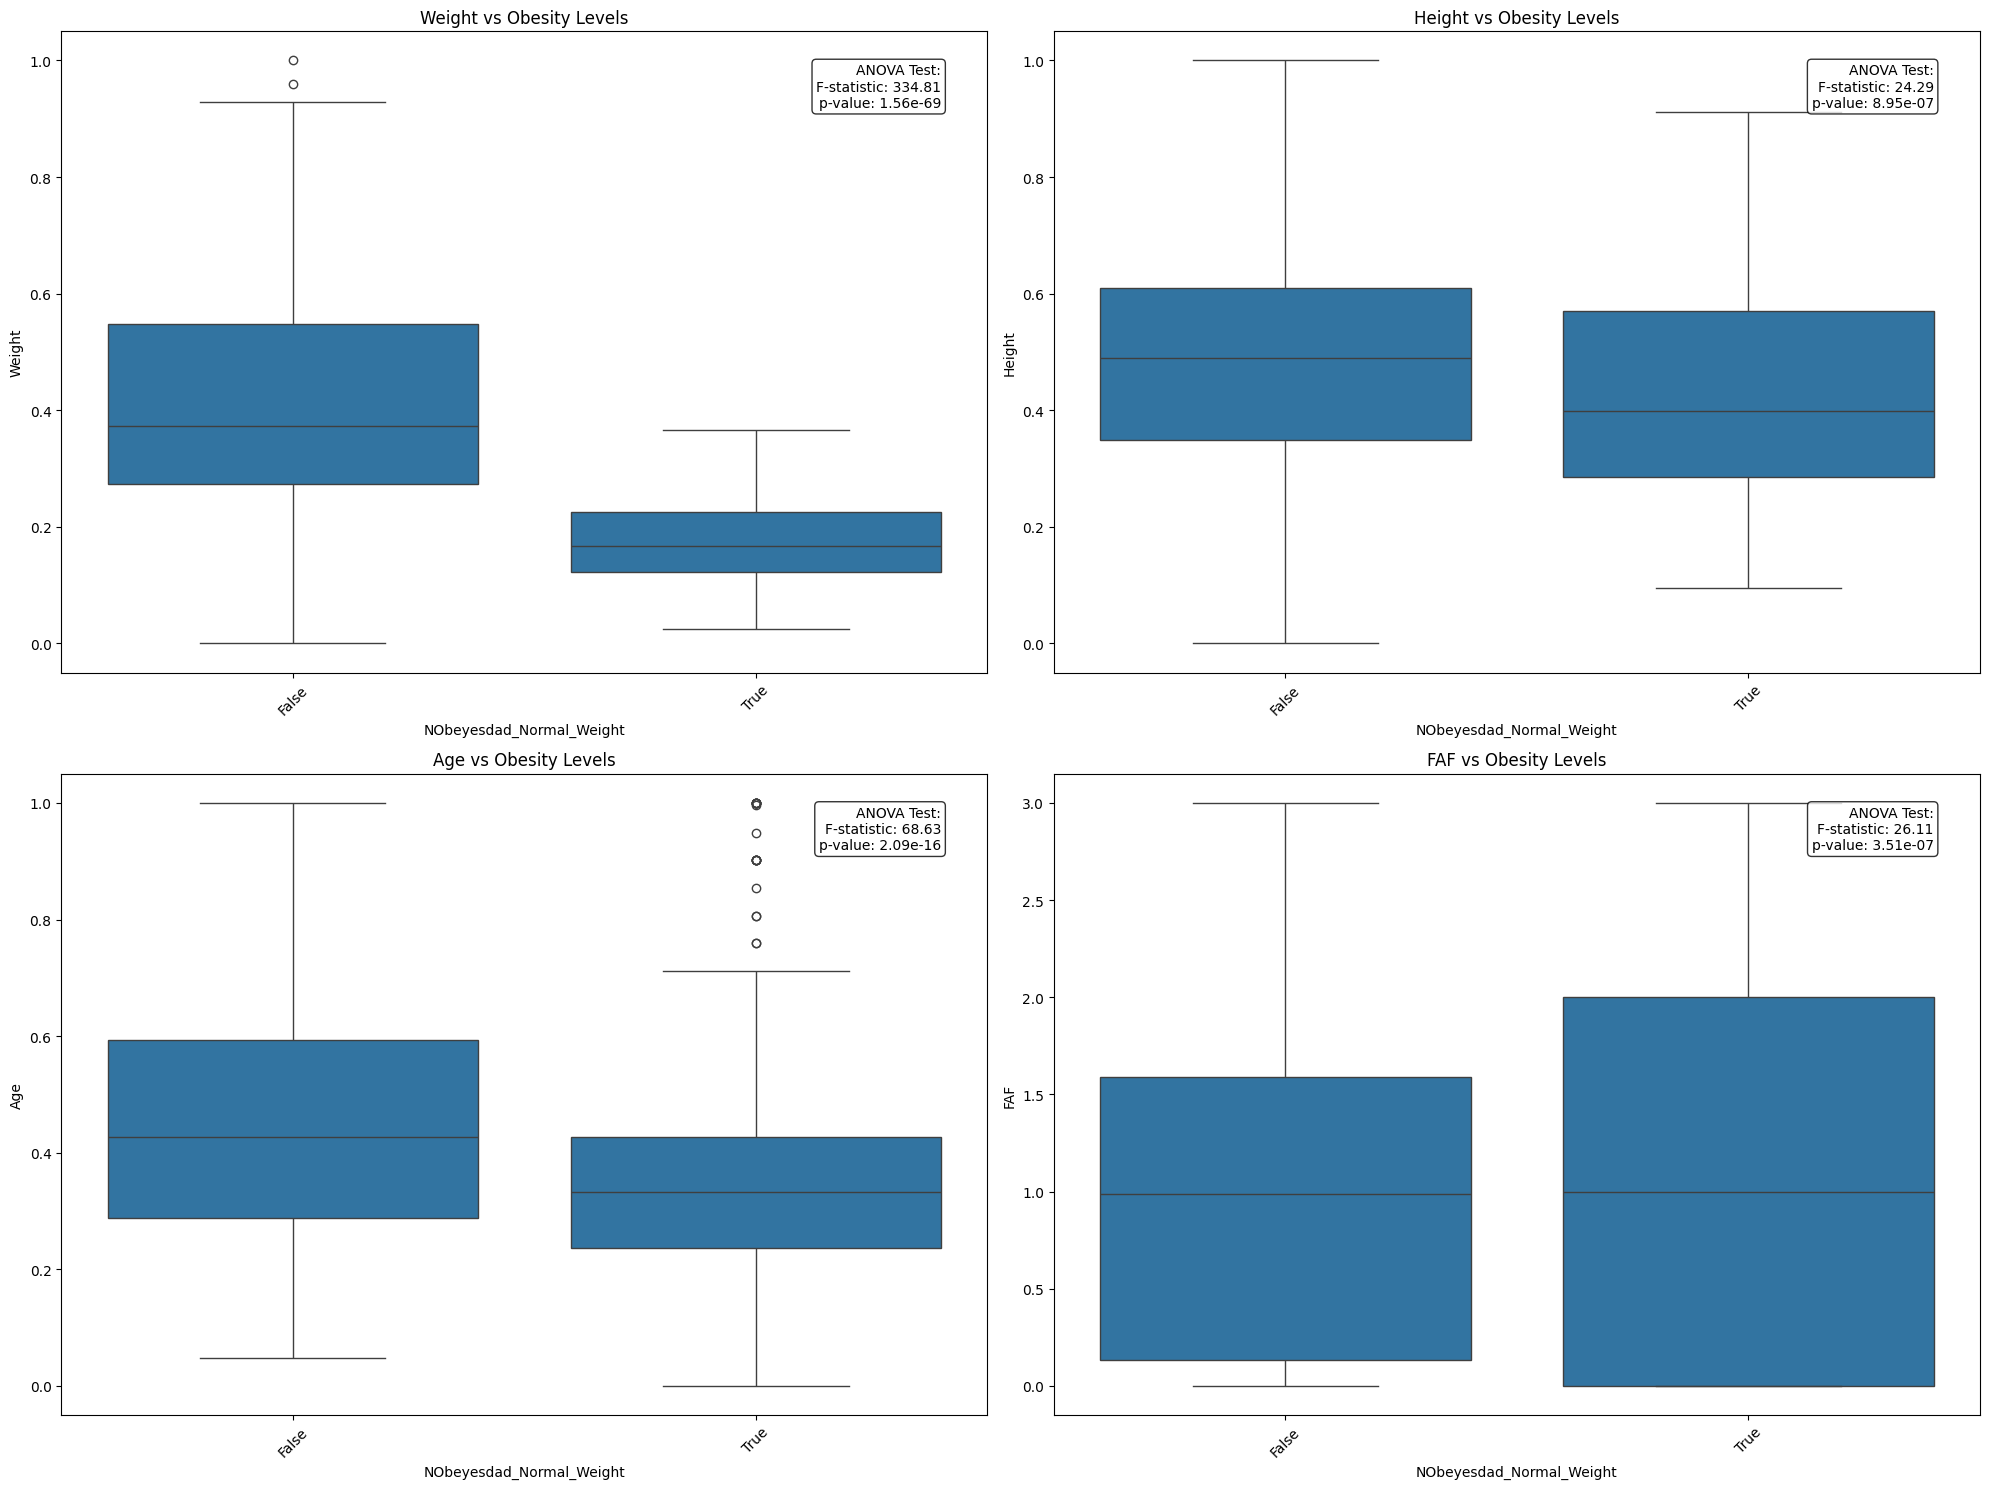

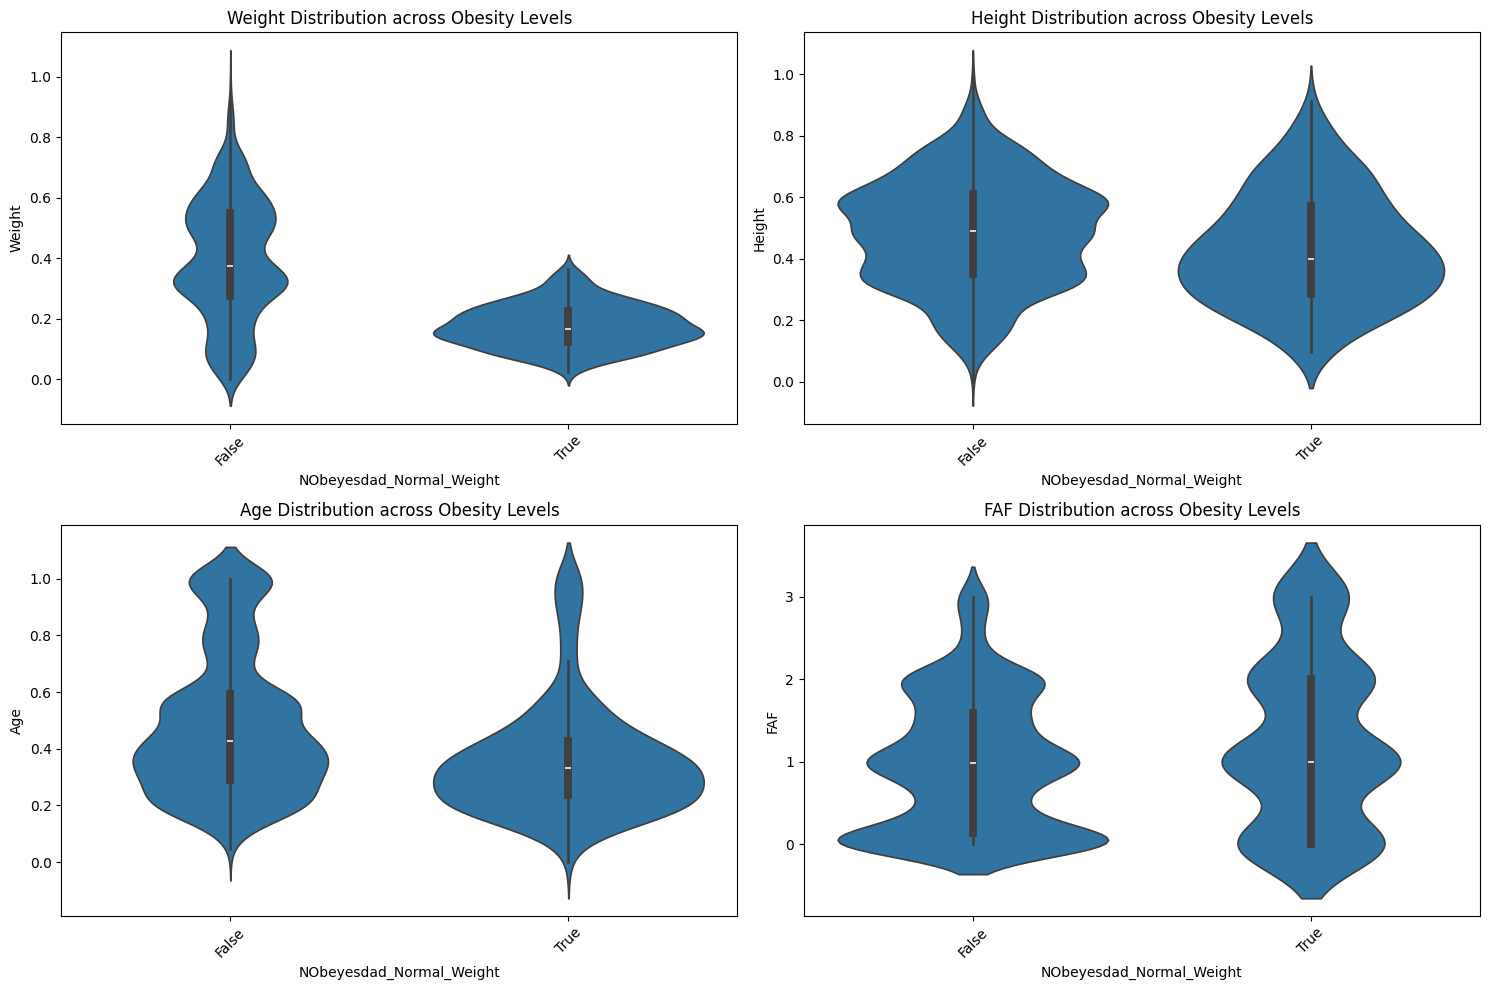

In [37]:
#relationship exploration
def explore_relationships(df):
    # Create subplots for each feature
    features = ['Weight', 'Height', 'Age', 'FAF']
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    axes = axes.ravel()

    for idx, feature in enumerate(features):
        # Create boxplot
        sns.boxplot(data=df, x='NObeyesdad_Normal_Weight', y=feature, ax=axes[idx])
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
        axes[idx].set_title(f'{feature} vs Obesity Levels')

        # Add ANOVA test results
        obesity_groups = [group for _, group in df.groupby('NObeyesdad_Normal_Weight')[feature]]
        f_statistic, p_value = stats.f_oneway(*obesity_groups)

        stats_text = f'ANOVA Test:\nF-statistic: {f_statistic:.2f}\np-value: {p_value:.2e}'
        axes[idx].text(0.95, 0.95, stats_text,
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Additional violin plots for better distribution visualization
    plt.figure(figsize=(15, 10))
    for idx, feature in enumerate(features, 1):
        plt.subplot(2, 2, idx)
        sns.violinplot(data=df, x='NObeyesdad_Normal_Weight', y=feature)
        plt.xticks(rotation=45)
        plt.title(f'{feature} Distribution across Obesity Levels')

    plt.tight_layout()
    plt.show()

# Explore relationships
explore_relationships(data)

<ipython-input-38-7c870be6384e>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
<ipython-input-38-7c870be6384e>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
<ipython-input-38-7c870be6384e>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
<ipython-input-38-7c870be6384e>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)


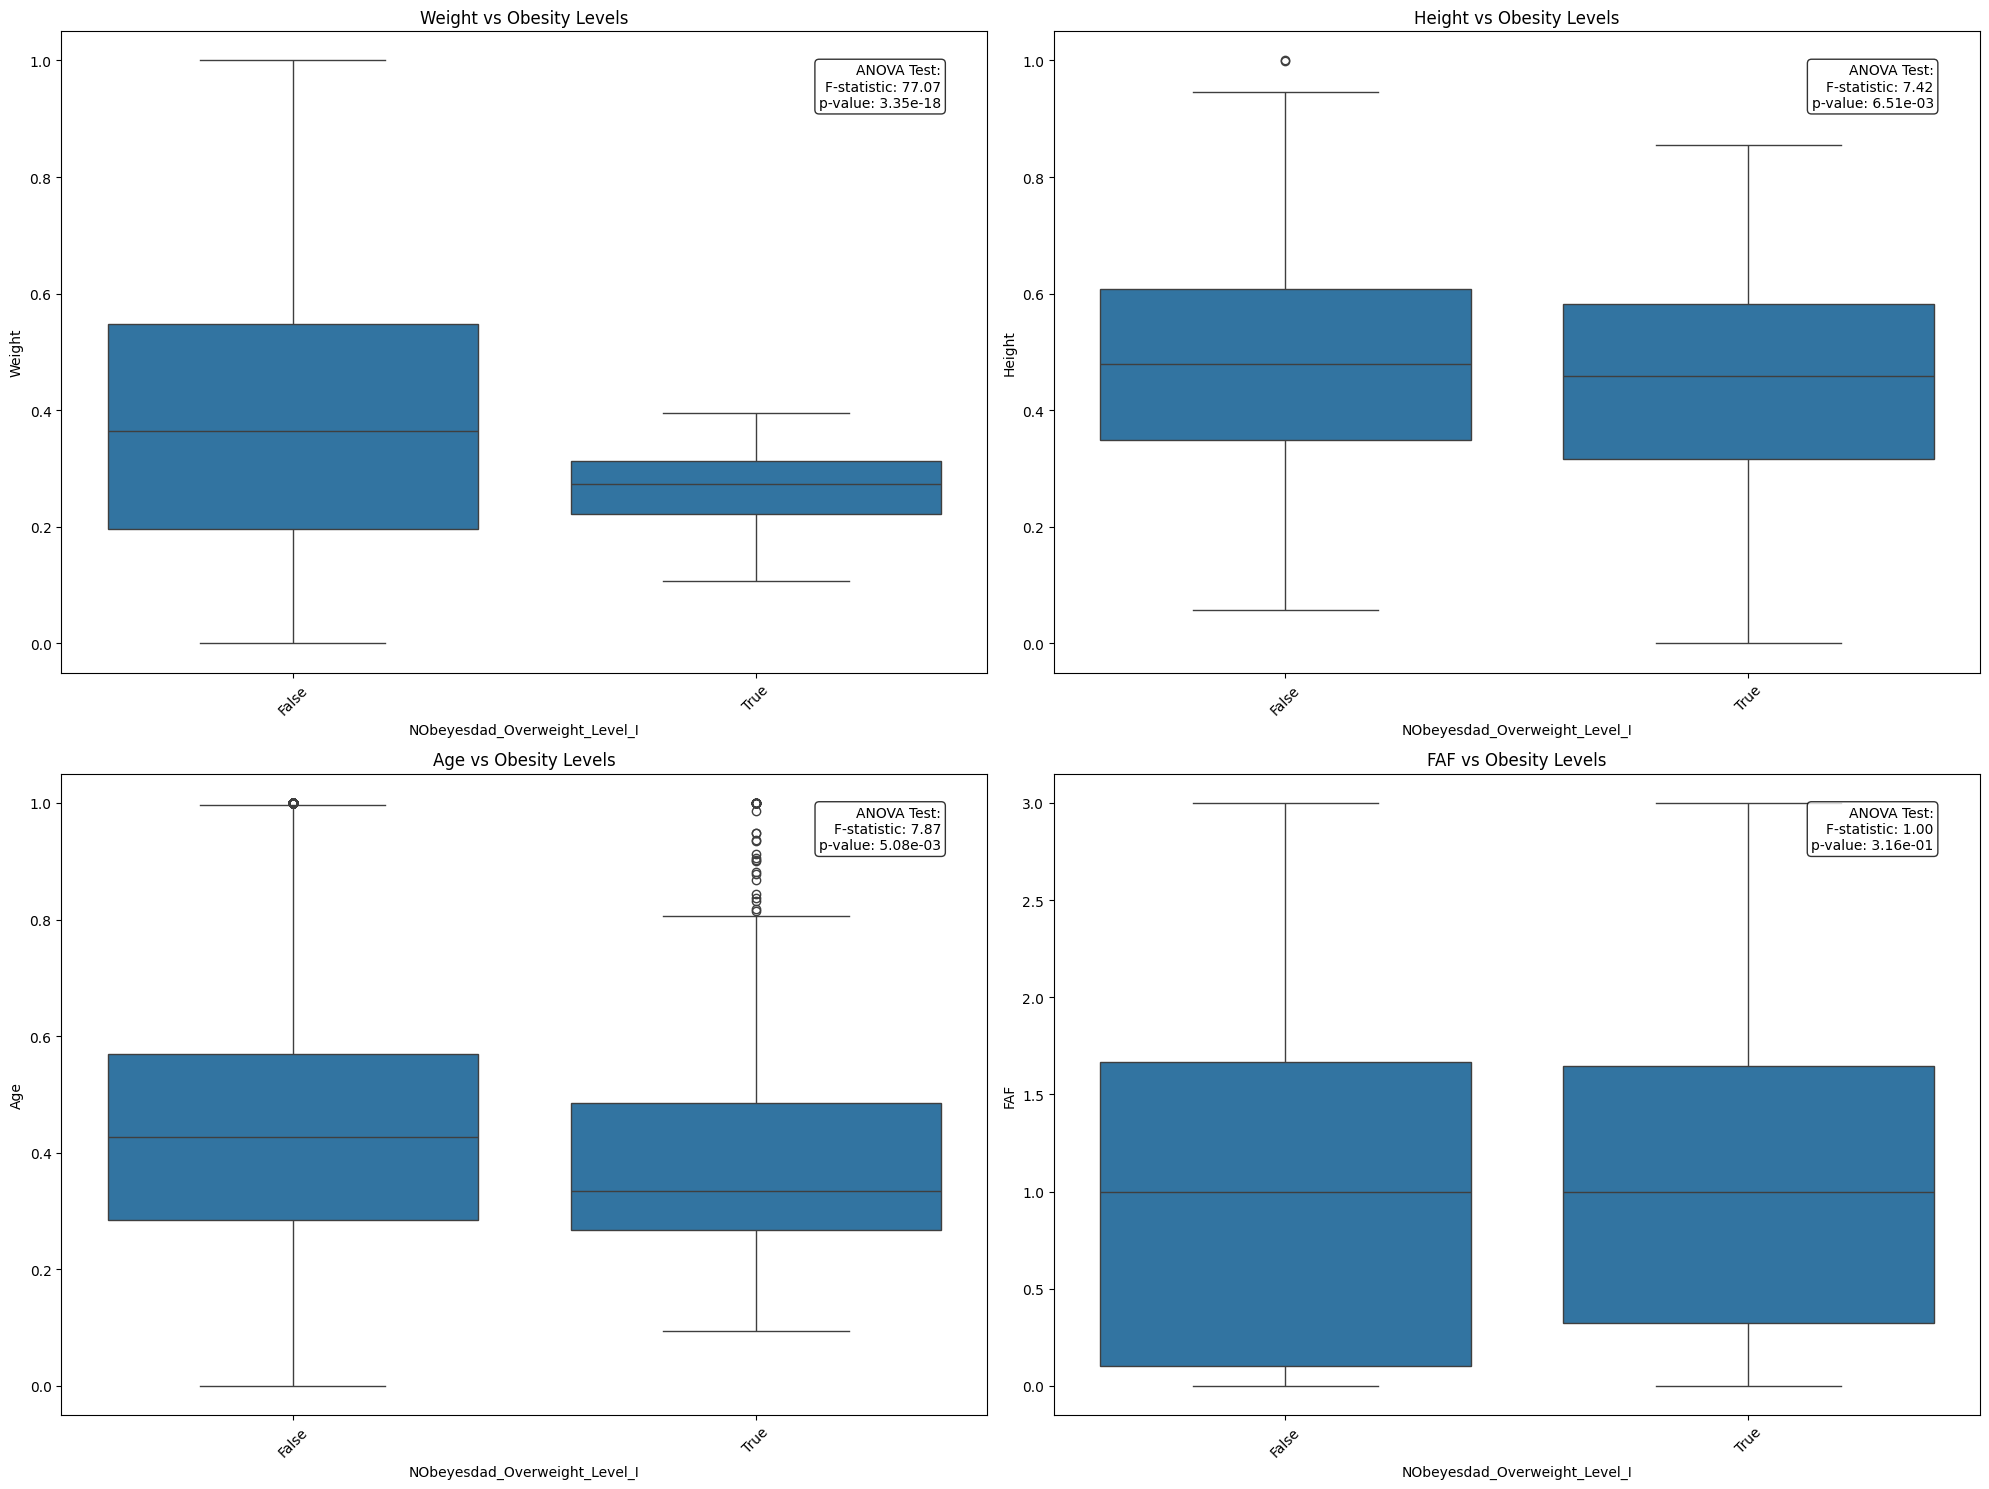

In [38]:
#relationship exploration
def explore_relationships(data):
    # Create subplots for each feature
    features = ['Weight', 'Height', 'Age', 'FAF']
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    axes = axes.ravel()

    for idx, feature in enumerate(features):
        # Create boxplot
        sns.boxplot(data=data, x='NObeyesdad_Overweight_Level_I', y=feature, ax=axes[idx])
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
        axes[idx].set_title(f'{feature} vs Obesity Levels')

        # Add ANOVA test results
        obesity_groups = [group for _, group in data.groupby('NObeyesdad_Overweight_Level_I')[feature]]
        f_statistic, p_value = stats.f_oneway(*obesity_groups)

        stats_text = f'ANOVA Test:\nF-statistic: {f_statistic:.2f}\np-value: {p_value:.2e}'
        axes[idx].text(0.95, 0.95, stats_text,
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()


# Explore relationships
explore_relationships(data)

<ipython-input-39-590da6405bbd>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
<ipython-input-39-590da6405bbd>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
<ipython-input-39-590da6405bbd>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
<ipython-input-39-590da6405bbd>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)


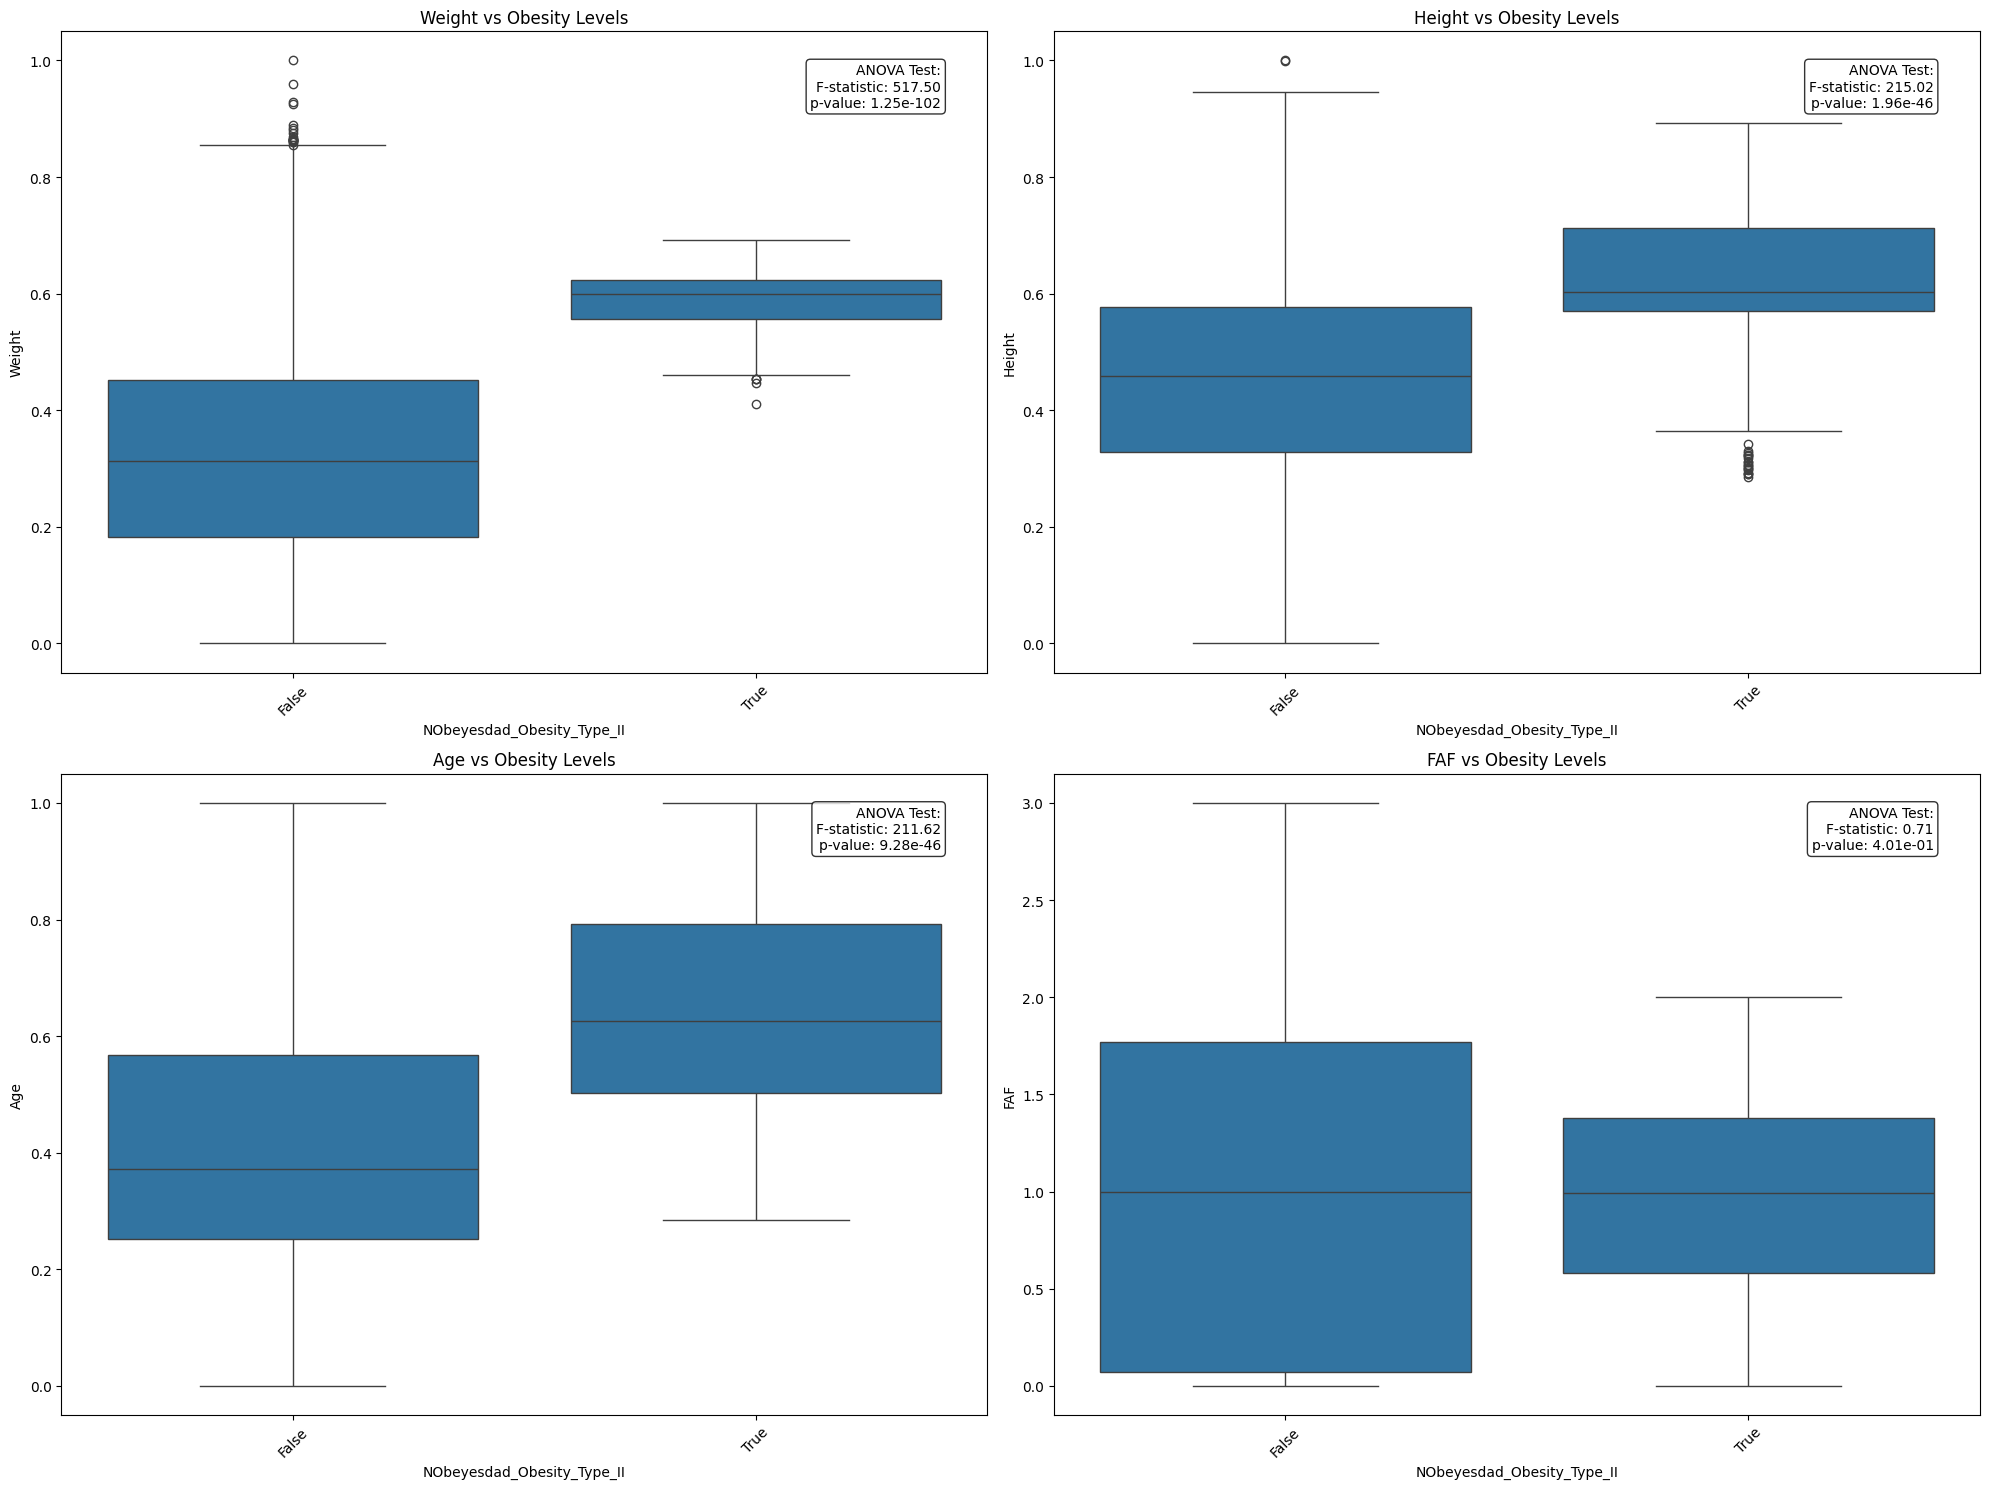

In [39]:

def explore_relationships(data):
    # Create subplots for each feature
    features = ['Weight', 'Height', 'Age', 'FAF']
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    axes = axes.ravel()

    for idx, feature in enumerate(features):
        # Create boxplot
        sns.boxplot(data=data, x='NObeyesdad_Obesity_Type_II', y=feature, ax=axes[idx])
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
        axes[idx].set_title(f'{feature} vs Obesity Levels')

        # Add ANOVA test results
        obesity_groups = [group for _, group in data.groupby('NObeyesdad_Obesity_Type_II')[feature]]
        f_statistic, p_value = stats.f_oneway(*obesity_groups)

        stats_text = f'ANOVA Test:\nF-statistic: {f_statistic:.2f}\np-value: {p_value:.2e}'
        axes[idx].text(0.95, 0.95, stats_text,
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()


# Explore relationships
explore_relationships(data)


correlation analysis

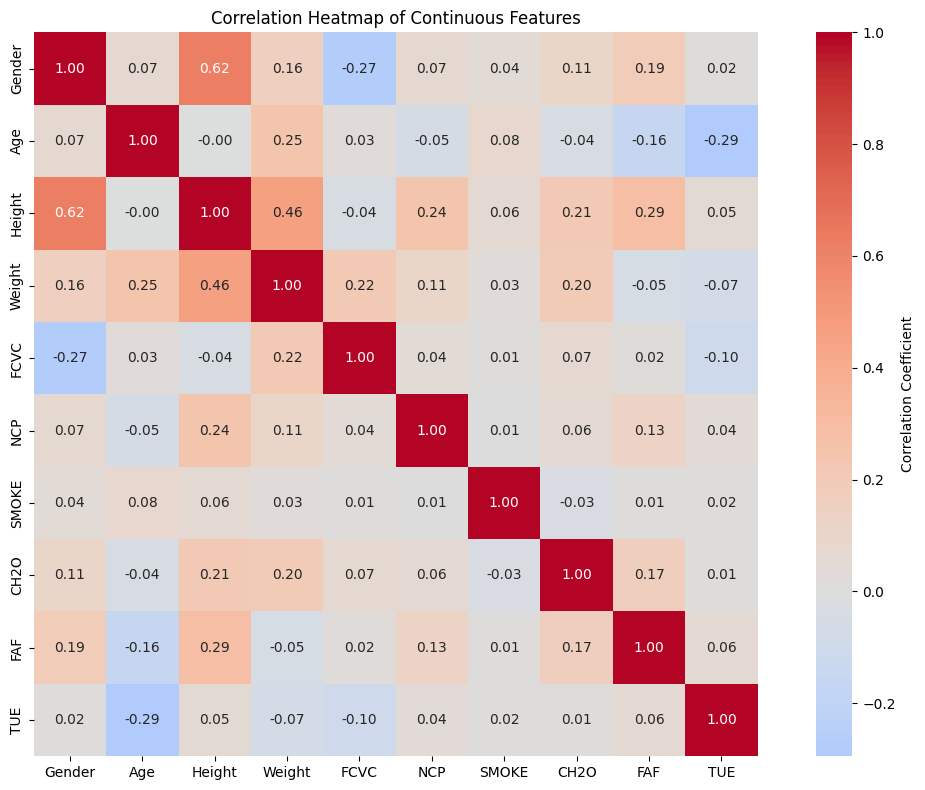


Significant correlations (|r| > 0.3):
  Feature 1 Feature 2  Correlation
0    Height    Gender     0.618483
1    Weight    Height     0.463120


In [40]:
def perform_correlation_analysis(data):
    # Select numerical columns
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

    # Calculate correlation matrix
    correlation_matrix = data[numerical_cols].corr()

    # Create heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                square=True,
                cbar_kws={'label': 'Correlation Coefficient'})

    plt.title('Correlation Heatmap of Continuous Features')
    plt.tight_layout()
    plt.show()

    # Calculate and display significant correlations
    print("\nSignificant correlations (|r| > 0.3):")
    significant_corr_list = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.3:
                significant_corr_list.append({
                    'Feature 1': correlation_matrix.columns[i],
                    'Feature 2': correlation_matrix.columns[j],
                    'Correlation': correlation_matrix.iloc[i, j]
                })

    significant_corr = pd.DataFrame(significant_corr_list)

    return significant_corr.sort_values(by='Correlation', key=abs, ascending=False)

# Perform correlation analysis
significant_correlations = perform_correlation_analysis(data)
print(significant_correlations)

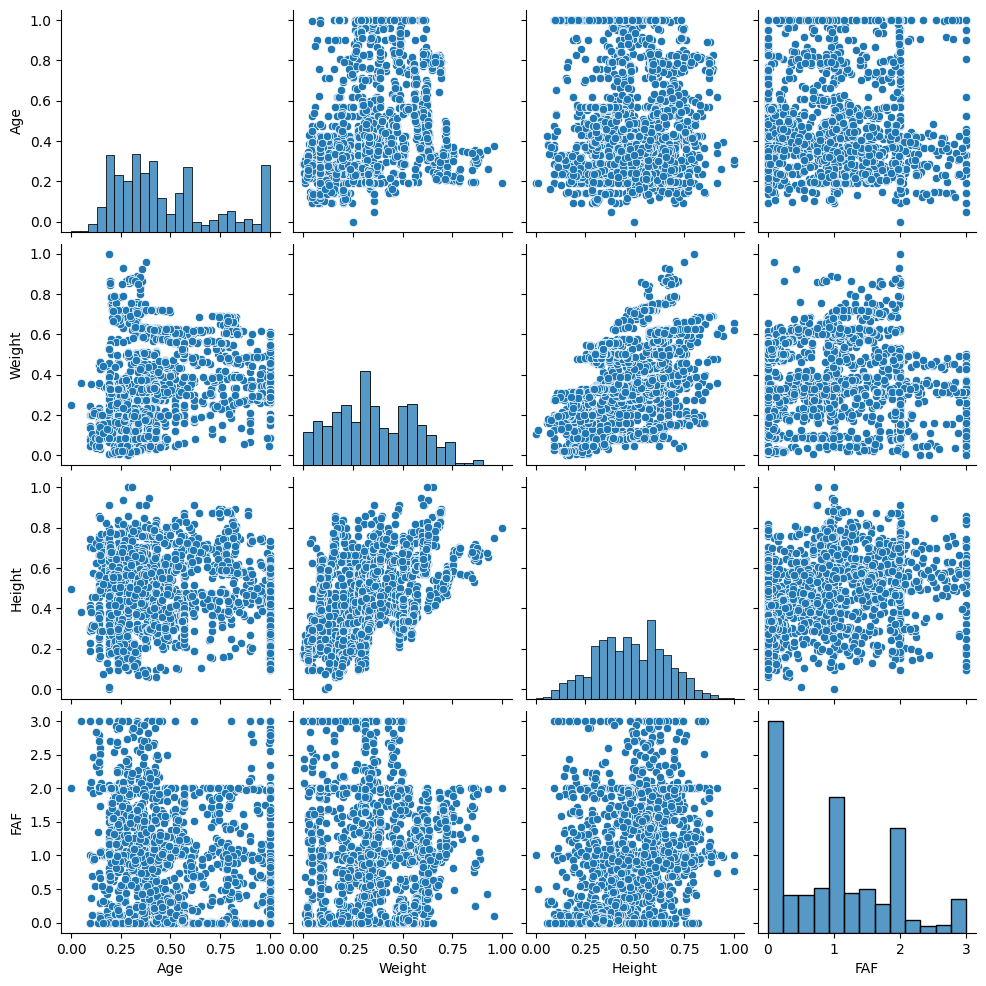

In [41]:
# Pair plots
sns.pairplot(data[['Age', 'Weight', 'Height', 'FAF']])
plt.show()


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [43]:
from sklearn.model_selection import train_test_split
data= pd.read_csv('/content/ObesityDataSet_raw_and_data.csv')
# Splitting the dataset
X = data.drop(columns=['NObeyesdad'])  # target variable column
X = X.select_dtypes(include=['number'])
y = data['NObeyesdad']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(solver='saga', max_iter=2000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)


# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Metrics:
Accuracy: 0.14893617021276595
Precision: 0.02363470711184951
Recall: 0.14893617021276595
F1 Score: 0.04079555966697502

Random Forest Metrics:
Accuracy: 0.950354609929078
Precision: 0.9506378053585501
Recall: 0.950354609929078
F1 Score: 0.9503961538840158


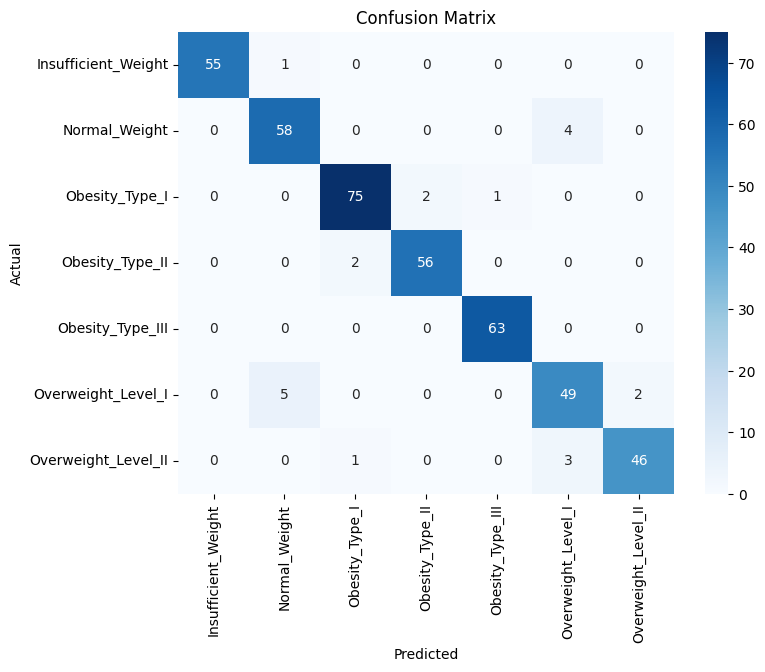

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate Logistic Regression
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted')}")

# Evaluate Random Forest
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted')}")

# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


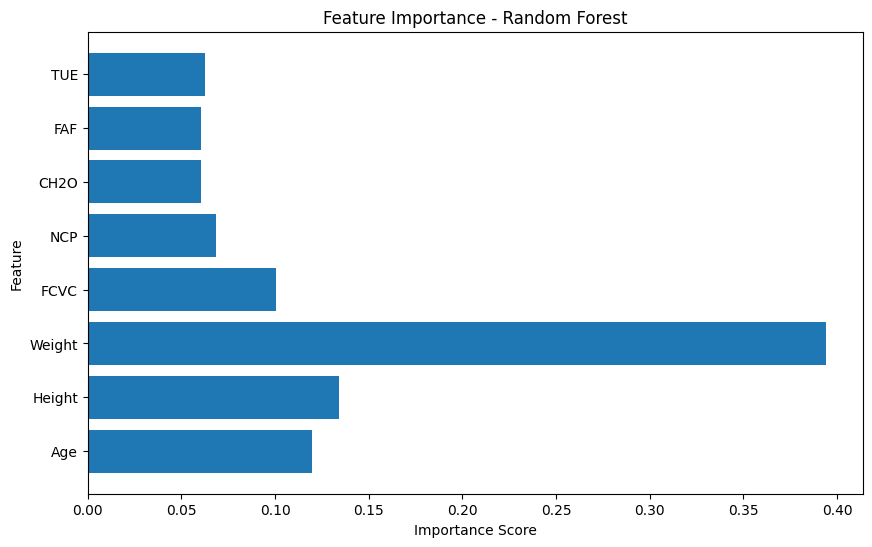

In [46]:

NObeyesdad = X_train.columns
importance_rf = rf_clf.feature_importances_

# Check alignment
assert len(NObeyesdad) == len(importance_rf), "Feature names and importance scores do not match!"

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(NObeyesdad, importance_rf)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
